In [20]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go


In [21]:
# Read .csv file
villager_info=pd.read_csv('villagers.csv')

In [22]:
# Make a dataframe
villagers_df=pd.DataFrame(villager_info)

villagers_df

,Name,Species,Gender,Personality,Hobby,Birthday,Catchphrase,Favorite Song,Style 1,Style 2,Color 1,Color 2,Wallpaper,Flooring,Furniture List,Filename,Unique Entry ID
0,Admiral,Bird,Male,Cranky,Nature,27-Jan,aye aye,Steep Hill,Cool,Cool,Black,Blue,dirt-clod wall,tatami,717;1849;7047;2736;787;5970;3449;3622;3802;410...,brd06,B3RyfNEqwGmcccRC3
1,Agent S,Squirrel,Female,Peppy,Fitness,2-Jul,sidekick,Go K.K. Rider,Active,Simple,Blue,Black,concrete wall,colorful tile flooring,7845;7150;3468;4080;290;3971;3449;1708;4756;25...,squ05,SGMdki6dzpDZyXAw5
2,Agnes,Pig,Female,Big Sister,Play,21-Apr,snuffle,K.K. House,Simple,Elegant,Pink,White,gray molded-panel wall,arabesque flooring,4129;7236;7235;7802;896;3428;4027;7325;3958;71...,pig17,jzWCiDPm9MqtCfecP
3,Al,Gorilla,Male,Lazy,Fitness,18-Oct,ayyyeee,Go K.K. Rider,Active,Active,Red,White,concrete wall,green rubber flooring,1452;4078;4013;833;4116;3697;7845;3307;3946;39...,gor08,LBifxETQJGEaLhBjC
4,Alfonso,Alligator,Male,Lazy,Play,9-Jun,it'sa me,Forest Life,Simple,Simple,Red,Blue,yellow playroom wall,green honeycomb tile,4763;3205;3701;1557;3623;85;3208;3584;4761;121...,crd00,REpd8KxB8p9aGBRSE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,Winnie,Horse,Female,Peppy,Fashion,31-Jan,hay-OK,K.K. Country,Cool,Simple,White,Gray,backyard-fence wall,backyard lawn,1626;1626;5970;4003;3509;1620;1627;3467;1631;1...,hrs05,b4HwfyvThyipScSAv
387,Wolfgang,Wolf,Male,Cranky,Education,25-Nov,snarrrl,K.K. D&B,Cool,Active,Black,Green,dark wooden-mosaic wall,stripe flooring,4117;7323;7323;3275;4109;3270;3196;4338;3200;3...,wol02,RbF2wcn6jRxtgLDRd
388,Yuka,Koala,Female,Snooty,Fashion,20-Jul,tsk tsk,Soulful K.K.,Cool,Elegant,Orange,Yellow,beige art-deco wall,simple purple flooring,3957;3955;2554;3974;3951;794;4106;3959;3958;997,kal00,QDcxk3dCNT6yeD9hk
389,Zell,Deer,Male,Smug,Music,7-Jun,pronk,K.K. Swing,Cool,Gorgeous,Purple,Gray,cityscape wall,monochromatic tile flooring,1875;863;4129;4053;4053;3951;794;3775;4046;423...,der02,LodBWtdMRZbjFNga9


In [23]:
# Drop columns that are not needed
villagers_df.drop(columns=['Name', 'Gender', 'Catchphrase', 'Style 1', 'Style 2', 'Color 1', 'Color 2',
                          'Wallpaper', 'Flooring', 'Furniture List', 'Filename', 'Unique Entry ID', 'Birthday'], inplace=True)


In [24]:
villagers_df.head()

,Species,Personality,Hobby,Favorite Song
0,Bird,Cranky,Nature,Steep Hill
1,Squirrel,Peppy,Fitness,Go K.K. Rider
2,Pig,Big Sister,Play,K.K. House
3,Gorilla,Lazy,Fitness,Go K.K. Rider
4,Alligator,Lazy,Play,Forest Life


In [25]:
# How many of each species
species_list=villagers_df.value_counts('Species').reset_index()


species_list.head(20)

,Species,0
0,Cat,23
1,Rabbit,20
2,Squirrel,18
3,Frog,18
4,Duck,17
5,Dog,16
6,Cub,16
7,Horse,15
8,Pig,15
9,Mouse,15


In [26]:
# Rename column
species_list.rename(columns={0:'Count'}, inplace=True)

species_list.head()

,Species,Count
0,Cat,23
1,Rabbit,20
2,Squirrel,18
3,Frog,18
4,Duck,17


In [27]:
# Plot the count of species 
fig = px.bar(species_list, x='Species', y='Count', title='Species of Villagers')

fig.show()

In [28]:
# Create the merged_col series
merged_col = villagers_df['Species'].str.cat(villagers_df['Hobby'], sep='-')


In [29]:
# Create a co-occurrence matrix
counts = merged_col.value_counts()
index = pd.MultiIndex.from_tuples(counts.index.str.split('-').tolist())
mat = pd.DataFrame(np.zeros((len(index.levels[0]), len(index.levels[1]))), index=index.levels[0], columns=index.levels[1])
for i in index:
    mat.loc[i[0], i[1]] = counts['-'.join(i)]

# Create the visual
fig = go.Figure(data=[go.Sankey(
    arrangement='snap',
    node=dict(
        pad=20,
        thickness=20,
        line=dict(color='black', width=0.5),
        label=list(mat.index) + list(mat.columns),
        color=['red'] * len(mat.index) + ['blue'] * len(mat.columns)
    ),
    link=dict(
        source=np.repeat(np.arange(len(mat.index)), len(mat.columns)),
        target=np.tile(np.arange(len(mat.index), len(mat.index) + len(mat.columns)), len(mat.index)),
        value=mat.values.flatten(),
    ),
)])

fig.update_layout(
    title_text='Species and Hobby Relationship',
    font_size=12,
    width=800,
    height=800,
)

fig.show()



In [30]:
# Count the personalities

personality_list=villagers_df.value_counts('Personality')

personality_list

Personality
Lazy          60
Normal        59
Cranky        55
Jock          55
Snooty        55
Peppy         49
Smug          34
Big Sister    24
dtype: int64

In [31]:
# Create a dataframe
personality_df=pd.DataFrame(personality_list)

personality_df.head()

,0
Personality,
Lazy,60
Normal,59
Cranky,55
Jock,55
Snooty,55


In [32]:
# Rename columns
personality_df.rename(columns={0:'Count of Personalities'}, inplace=True)

personality_df.head()

,Count of Personalities
Personality,
Lazy,60
Normal,59
Cranky,55
Jock,55
Snooty,55


(array([ 0., 10., 20., 30., 40., 50., 60., 70.]),
 [Text(0, 0.0, '0'),
  Text(0, 10.0, '10'),
  Text(0, 20.0, '20'),
  Text(0, 30.0, '30'),
  Text(0, 40.0, '40'),
  Text(0, 50.0, '50'),
  Text(0, 60.0, '60'),
  Text(0, 70.0, '70')])

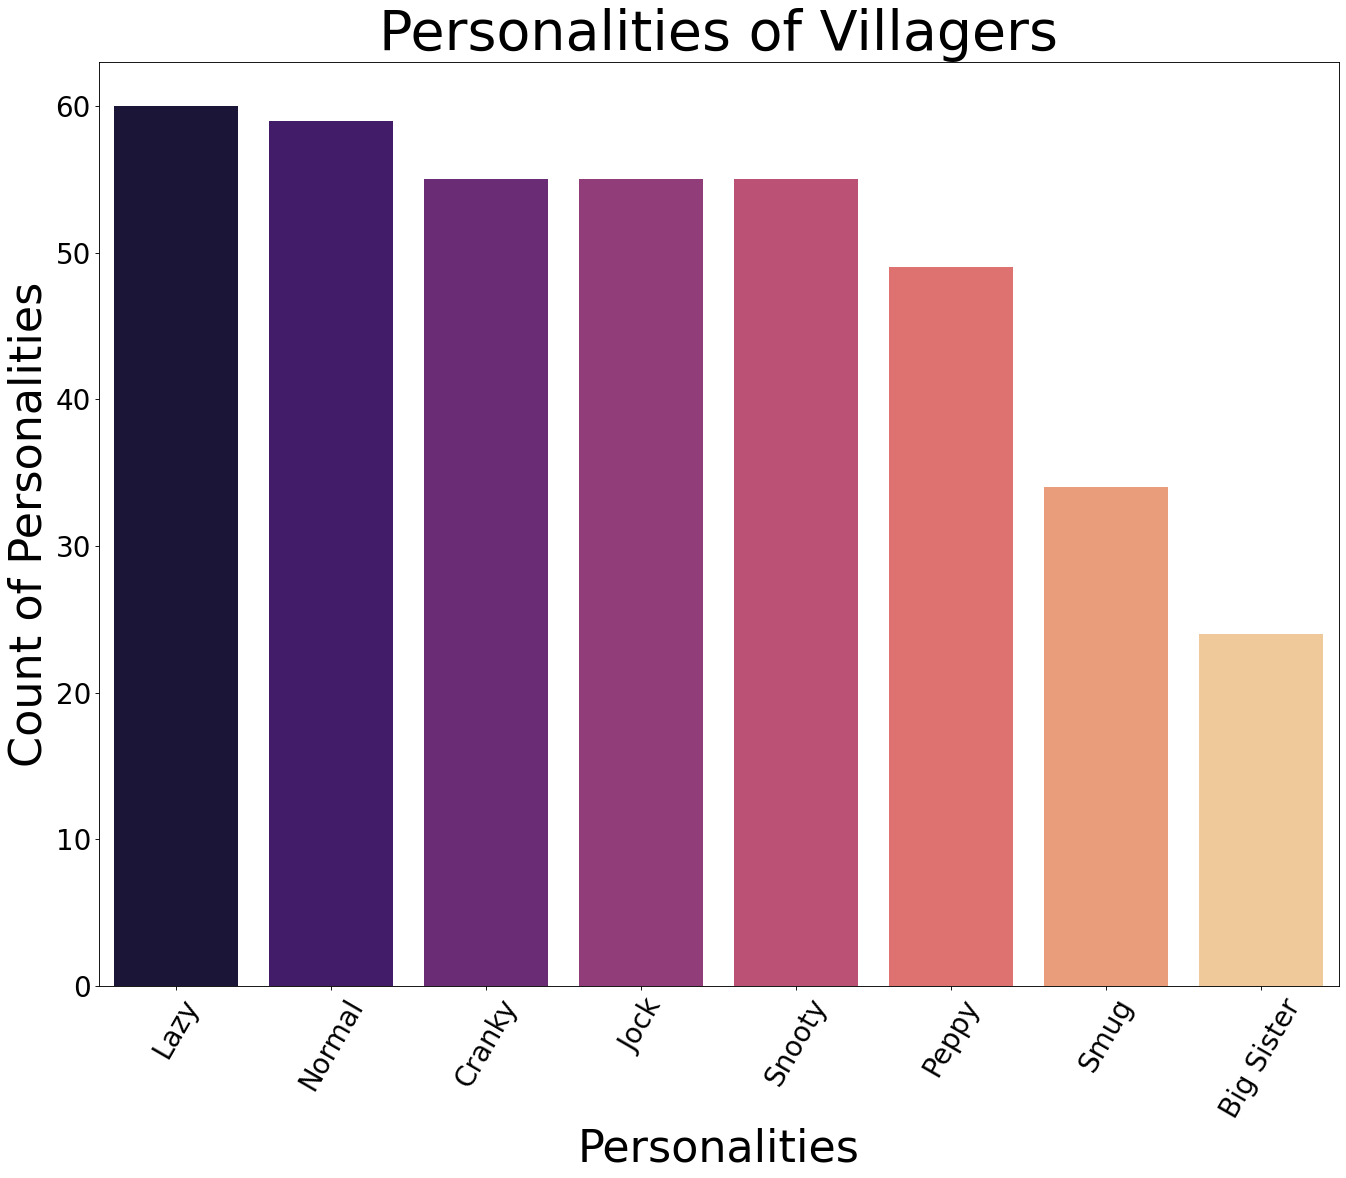

In [33]:
# Barchart for personalities
plt.figure(figsize=(20,15),dpi=80)

sns.barplot(x=personality_df.index, y='Count of Personalities', data=personality_df,
           palette='magma')

plt.title('Personalities of Villagers', fontsize=50)

plt.xlabel('Personalities', fontsize=40)

plt.ylabel('Count of Personalities', fontsize=40)

plt.xticks(rotation=60, fontsize=25)

plt.yticks(fontsize=25)